In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("../input/multan-plot-prices-dataset-ver-10/new_multanplots.csv")
df.shape

(208, 15)

In [3]:
df.head()

,Sr.,Colony,Phase,Block,Zone,Size in Marla,Side,Park Facing,Market Facing,Near Mosque,Near School,Electricity,Natural Gas,WASA,Price (in Lacs)
0,1,AMC,1,1,1,5.0,0,0,0,0,0,1,1,1,25.0
1,2,AMC,1,1,1,5.0,0,1,0,0,0,1,1,1,25.0
2,3,AMC,1,1,2,5.0,0,1,1,0,0,1,1,1,27.5
3,4,AMC,1,1,2,5.0,0,1,1,1,0,1,1,1,27.5
4,5,AMC,1,1,1,5.0,1,0,0,0,0,1,1,1,25.0


# EDA

In [4]:
df.describe(include='all')

,Sr.,Colony,Phase,Block,Zone,Size in Marla,Side,Park Facing,Market Facing,Near Mosque,Near School,Electricity,Natural Gas,WASA,Price (in Lacs)
count,208.000000,208,208.0,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.0,208.000000,208.0,208.000000
unique,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,DG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,104.500000,NaN,1.0,1.480769,1.105769,11.875481,0.442308,0.322115,0.086538,0.187500,0.033654,1.0,0.697115,1.0,41.302909
std,60.188592,NaN,0.0,1.094393,0.308284,8.010381,0.497859,0.468414,0.281836,0.391254,0.180772,0.0,0.460614,0.0,24.955243
min,1.000000,NaN,1.0,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.0,9.000000
25%,52.750000,NaN,1.0,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.0,25.937500
50%,104.500000,NaN,1.0,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.0,35.900000
75%,156.250000,NaN,1.0,1.000000,1.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.0,52.125000


In [5]:
df.isnull().sum()

Sr.                0
Colony             0
Phase              0
Block              0
Zone               0
Size in Marla      0
Side               0
Park Facing        0
Market Facing      0
Near Mosque        0
Near School        0
Electricity        0
Natural Gas        0
WASA               0
Price (in Lacs)    0
dtype: int64

In [6]:
df.dtypes

Sr.                  int64
Colony              object
Phase                int64
Block                int64
Zone                 int64
Size in Marla      float64
Side                 int64
Park Facing          int64
Market Facing        int64
Near Mosque          int64
Near School          int64
Electricity          int64
Natural Gas          int64
WASA                 int64
Price (in Lacs)    float64
dtype: object

array([[<AxesSubplot:title={'center':'Sr.'}>,
        <AxesSubplot:title={'center':'Phase '}>,
        <AxesSubplot:title={'center':'Block'}>,
        <AxesSubplot:title={'center':'Zone'}>],
       [<AxesSubplot:title={'center':'Size in Marla'}>,
        <AxesSubplot:title={'center':'Side'}>,
        <AxesSubplot:title={'center':'Park Facing'}>,
        <AxesSubplot:title={'center':'Market Facing'}>],
       [<AxesSubplot:title={'center':'Near Mosque'}>,
        <AxesSubplot:title={'center':'Near School'}>,
        <AxesSubplot:title={'center':'Electricity'}>,
        <AxesSubplot:title={'center':'Natural Gas'}>],
       [<AxesSubplot:title={'center':'WASA'}>,
        <AxesSubplot:title={'center':'Price (in Lacs)'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

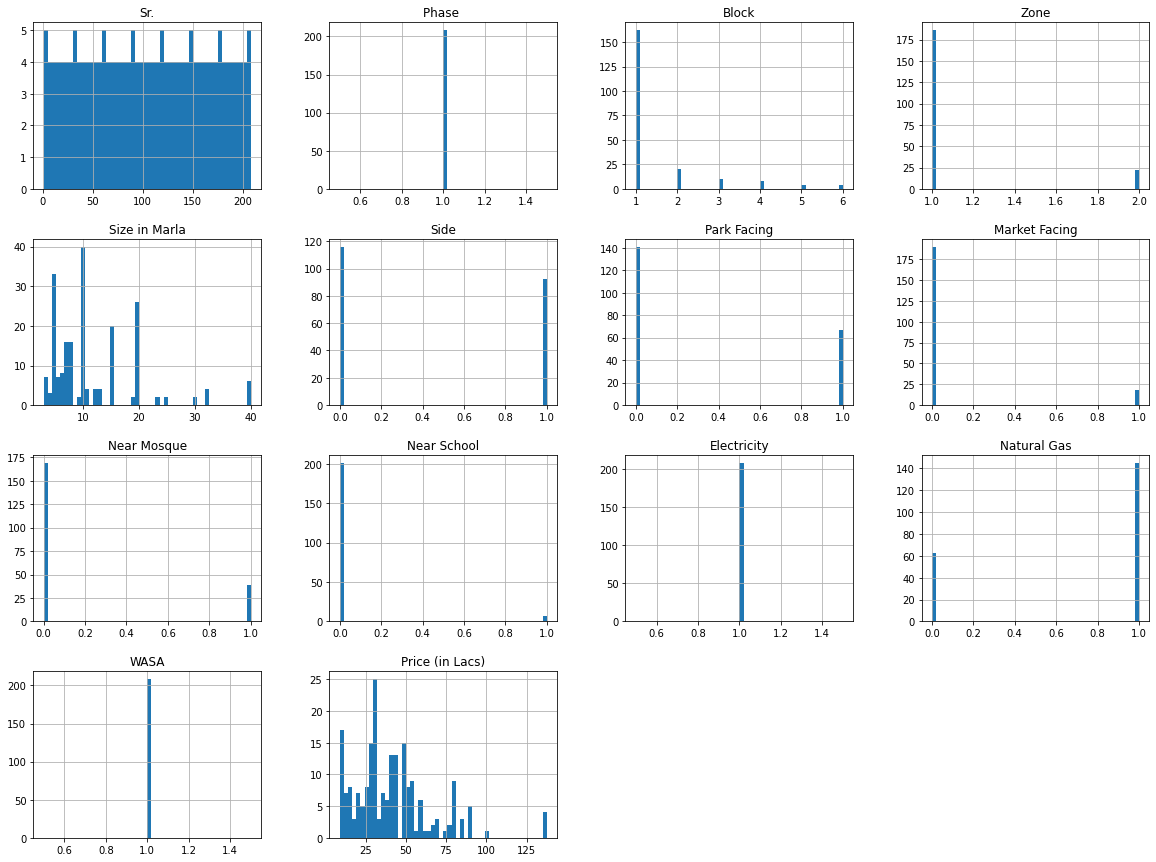

In [7]:
df.hist(bins=50, figsize=(20, 15))

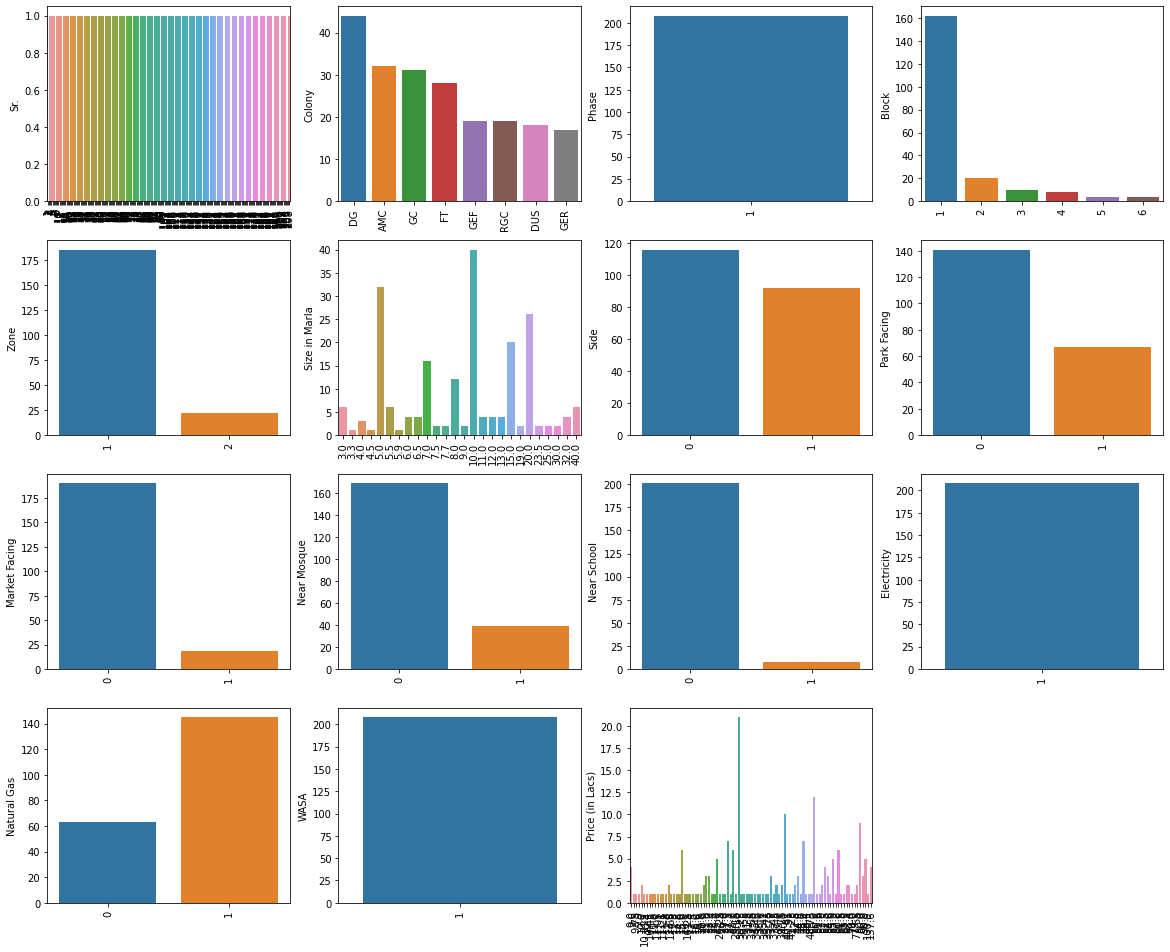

In [8]:
plt.figure(figsize=(20, 38))
plt.xticks(rotation=90)
index = 1
 
for col in df:
    y = df[col].value_counts()
    plt.subplot(9, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

Text(0, 0.5, 'Plots')

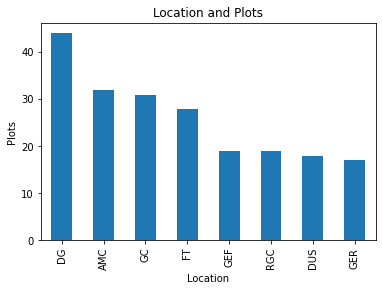

In [9]:
plt.figure()
df['Colony'].value_counts().plot(kind='bar')
plt.title('Location and Plots')
plt.xlabel('Location')
plt.ylabel('Plots')

## Price (in Lacs) x Colony

[Text(0.5, 1.0, 'Price (in Lacs) x Colony')]

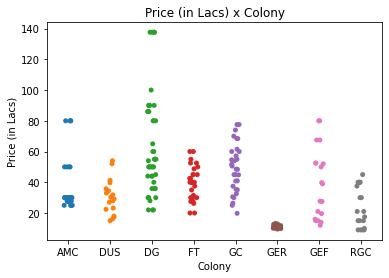

In [10]:
sns.stripplot(x='Colony',y='Price (in Lacs)',data=df, size=5).set(title='Price (in Lacs) x Colony')

[Text(0.5, 1.0, 'Price (in Lacs) x Colony')]

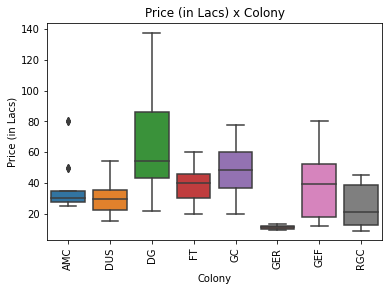

In [11]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x='Colony',y='Price (in Lacs)').set(title='Price (in Lacs) x Colony')

## Size in Marla x Colony

[Text(0.5, 1.0, 'Size in Marla x Colony')]

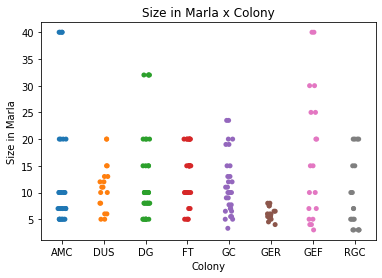

In [12]:
sns.stripplot(x='Colony',y='Size in Marla',data=df, size=5).set(title='Size in Marla x Colony')

[Text(0.5, 1.0, 'Size in Marla x Colony')]

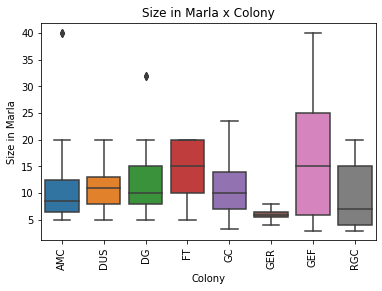

In [13]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x='Colony',y='Size in Marla').set(title='Size in Marla x Colony')

## Price (in Lac) x Size in Marla

[Text(0.5, 1.0, 'Price (in Lac) x Size in Marla')]

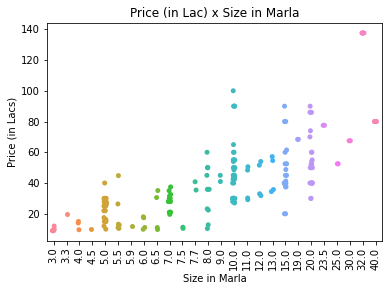

In [14]:
plt.xticks(rotation=90)
sns.stripplot(x='Size in Marla',y='Price (in Lacs)',data=df, size=5).set(title='Price (in Lac) x Size in Marla')

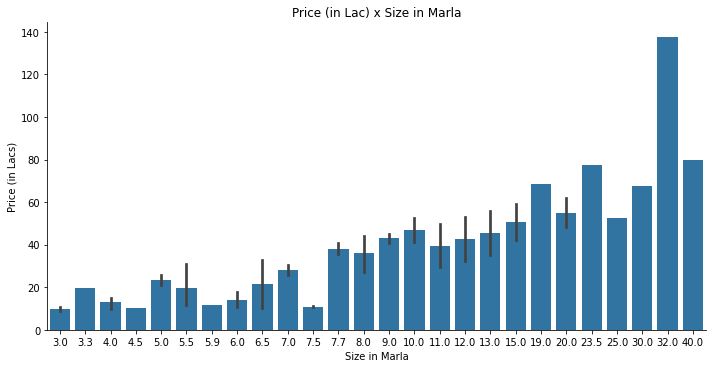

In [15]:
g = sns.FacetGrid(df, sharex=False, sharey=False,  height=5, aspect=2)
g.map_dataframe(sns.barplot, x='Size in Marla',y='Price (in Lacs)').set(title='Price (in Lac) x Size in Marla')

[Text(0.5, 1.0, 'Price (in Lac) x Size in Marla')]

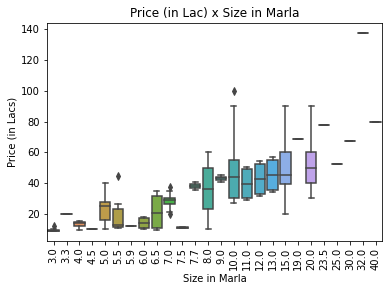

In [16]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x='Size in Marla',y='Price (in Lacs)').set(title='Price (in Lac) x Size in Marla')

## Other Comparisons

[Text(0.5, 1.0, 'Natural Gas x Colony')]

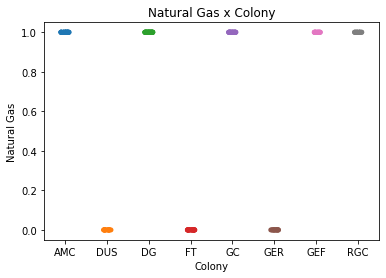

In [17]:
sns.stripplot(x='Colony',y='Natural Gas',data=df, size=5).set(title='Natural Gas x Colony')

[Text(0.5, 1.0, 'Colony x Near to Schools')]

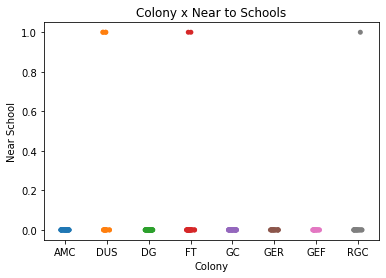

In [18]:
sns.stripplot(x='Colony',y='Near School',data=df, size=5).set(title='Colony x Near to Schools')

[Text(0.5, 1.0, 'Colony x Facing Market')]

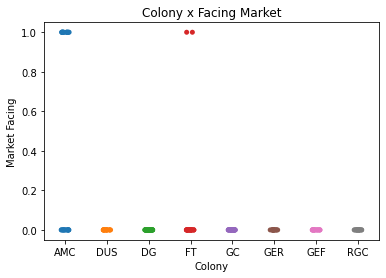

In [19]:
sns.stripplot(x='Colony',y='Market Facing',data=df, size=5).set(title='Colony x Facing Market')

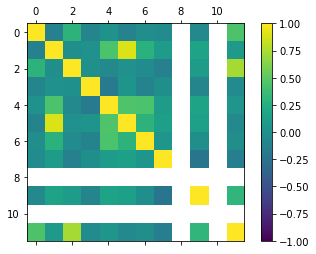

In [20]:
names=['Colony','Block','Zone','Size in Marla','Side','Park Facing','Market Facing','Near Mosque','Near School','Electricity','Natural Gas','WASA','Price (in Lacs)']
df=df[names]
correlations= df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,15,1)
plt.show()

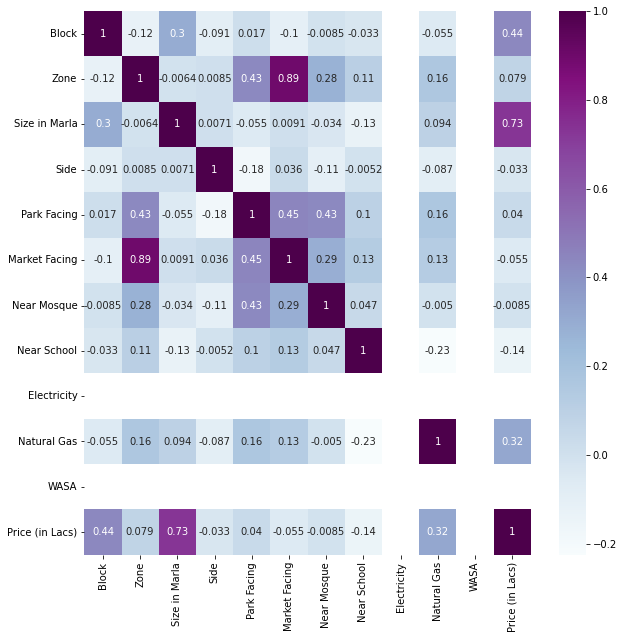

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop('Colony',axis=1).corr(),cmap="BuPu",annot=True)
plt.show()

# Linear Regression

In [22]:
X = df[['Price (in Lacs)', 'Size in Marla']]
y = df['Price (in Lacs)']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
print(lr.intercept_)

-2.842170943040401e-14


In [27]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Price (in Lacs),1.000000e+00
Size in Marla,5.468353e-17


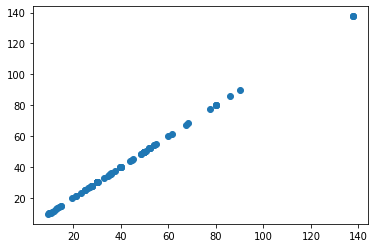

In [28]:
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


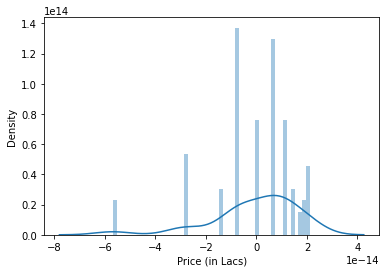

In [29]:
sns.distplot((y_test-predictions),bins=50);

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2624821822880351e-14
MSE: 2.901129890962797e-28
RMSE: 1.703270351694879e-14


# Random Forest Regressor

In [31]:
rf = RandomForestRegressor(max_depth=11, n_estimators=20, random_state=51)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, n_estimators=20, random_state=51)

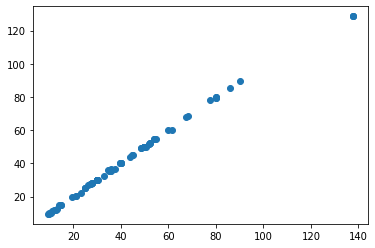

In [32]:
rf_predictions = rf.predict(X_test)
plt.scatter(y_test,rf_predictions)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


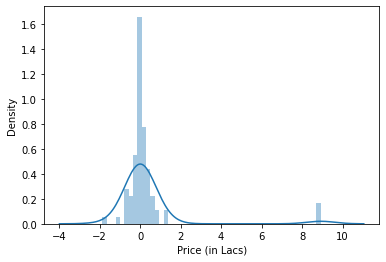

In [33]:
sns.distplot((y_test-rf_predictions),bins=50);

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_predictions))
print('MSE:', metrics.mean_squared_error(y_test, rf_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)))

MAE: 0.5830505952380962
MSE: 3.021518545386915
RMSE: 1.7382515771276938
